# Исследование технологического процесса очистки золота

**Постановка задачи**

Подготовьте прототип модели машинного обучения компании, которая разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

**Стадии**
1. *Флотация*
<br>Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

2. *Очистка*
<br>Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

**Описание данных**
    
*Технологический процесс*

* *Rougher feed* — исходное сырье
* *Rougher additions (или reagent additions)* — флотационные реагенты: Xanthate, Sulphate, Depressant
    - Xanthate — ксантогенат (промотер, или активатор флотации);
    - Sulphate — сульфат (на данном производстве сульфид натрия);
    - Depressant — депрессант (силикат натрия).
* *Rougher process* (англ. «грубый процесс») — флотация
* *Rougher tails* — отвальные хвосты
* *Float banks* — флотационная установка
* *Cleaner process* — очистка
* *Rougher Au* — черновой концентрат золота
* *Final Au* — финальный концентрат золота

**Параметры этапов**
* *air amount* — объём воздуха
* *fluid levels* — уровень жидкости
* *feed size* — размер гранул сырья
* feed rate*  — скорость подачи

**Наименование признаков**
*Наименование признаков должно быть такое:*

[этап].[тип_параметра].[название_параметра]
Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:
- *rougher* — флотация
- *primary_cleaner* — первичная очистка
- *secondary_cleaner* — вторичная очистка
- *final* — финальные характеристики

Возможные значения для блока [тип_параметра]:
- *input* — параметры сырья
- *output* — параметры продукта
- *state* — параметры, характеризующие текущее состояние этапа
- *calculation* — расчётные характеристики

Необходимо:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Эффективность обогащения расчитывается по следующей формуле:

$$Recovery = \frac{C × (F - T)}{F × (C - T)}$$

где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

В качетстве метрики качетсва применяется sMAPE (Symmetric Mean Absolute Percentage Error), которая вычисляется по формуле:

$$sMAPE = \frac{1}{N} × \sum_{i=1}^{N}\frac{|y_{i} - \stackrel{\land}{y_{i}}|}{(|y_{i}| + |\stackrel{\land}{y_{i}}|)/2}$$

где:

$y_{i}$ - значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество;

$\stackrel{\land}{y_{i}}$ - значение предсказания для объекта с порядковым номером i, например, в тестовой выборке;

N - количество объектов в выборке

Итоговая метрика складывается из двух величин:

$$Итоговое  sMAPE = 0.25 × sMAPE(rougher) + 0.75 × sMAPE(final)$$

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#gold_recovery_train_new.csv" data-toc-modified-id="gold_recovery_train_new.csv-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>gold_recovery_train_new.csv</a></span></li><li><span><a href="#gold_recovery_test_new.csv" data-toc-modified-id="gold_recovery_test_new.csv-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>gold_recovery_test_new.csv</a></span></li><li><span><a href="#gold_recovery_full_new.csv" data-toc-modified-id="gold_recovery_full_new.csv-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>gold_recovery_full_new.csv</a></span></li><li><span><a href="#Проверка-рассчета-эффективности-обогащения-чернового-концетрата" data-toc-modified-id="Проверка-рассчета-эффективности-обогащения-чернового-концетрата-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка рассчета эффективности обогащения чернового концетрата</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Train-и-Test" data-toc-modified-id="Train-и-Test-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Train и Test</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов на различных этапах очистки</a></span></li><li><span><a href="#Размер-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Размер-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Размер гранул сырья на обучающей и тестовой выборках</a></span><ul class="toc-item"><li><span><a href="#исходное-сырьё" data-toc-modified-id="исходное-сырьё-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>исходное сырьё</a></span></li><li><span><a href="#стадия-первичной-очистки" data-toc-modified-id="стадия-первичной-очистки-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>стадия первичной очистки</a></span></li></ul></li><li><span><a href="#Cуммарная-концентрация-всех-веществ" data-toc-modified-id="Cуммарная-концентрация-всех-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cуммарная концентрация всех веществ</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных" data-toc-modified-id="Разделение-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разделение данных</a></span></li><li><span><a href="#Вычисление-итоговой-sMAPE" data-toc-modified-id="Вычисление-итоговой-sMAPE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вычисление итоговой sMAPE</a></span></li><li><span><a href="#Оценка-моделей-кросс-валидацией-на-обучающей-выборке" data-toc-modified-id="Оценка-моделей-кросс-валидацией-на-обучающей-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Оценка моделей кросс-валидацией на обучающей выборке</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Поиск-гиперпараметров" data-toc-modified-id="Поиск-гиперпараметров-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Поиск гиперпараметров</a></span><ul class="toc-item"><li><span><a href="#GridSearch-для-Линейной-Регрессии" data-toc-modified-id="GridSearch-для-Линейной-Регрессии-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>GridSearch для Линейной Регрессии</a></span></li><li><span><a href="#GridSearch-для-Случайного-Леса" data-toc-modified-id="GridSearch-для-Случайного-Леса-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>GridSearch для Случайного Леса</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></div>

## Загрузка и подготовка данных

Импортируем библиотеки:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
import pandas as pd
import seaborn as sns

from scipy.stats import mannwhitneyu as mw
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

Настроим вывод для вещественных чисел:

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

### gold_recovery_train_new.csv

Прочитаем файл `gold_recovery_train_new.csv` из папки `datasets` и сохраним его в переменной `train`:

In [4]:
try:
    PATH = 'datasets/'
    train = pd.read_csv(os.path.join(PATH, 'gold_recovery_train_new.csv'))
    print('Прочитали файл путь:', PATH)
except:
    print('У нас проблема')

Прочитали файл путь: datasets/


Выведем на экран случайные 5 строк таблицы `train`:

In [5]:
train.sample(5).T

,1649,13351,11179,5938,11353
date,2016-04-02 19:00:00,2018-07-05 03:59:59,2018-03-23 06:59:59,2017-03-03 09:59:59,2018-04-04 10:59:59
final.output.concentrate_ag,4.91,4.01,4.74,6.40,4.35
final.output.concentrate_pb,11.19,10.79,11.79,9.88,10.09
final.output.concentrate_sol,7.99,6.66,7.29,8.27,11.06
final.output.concentrate_au,45.82,46.30,45.40,44.00,46.27
final.output.recovery,65.53,72.32,74.09,100.00,62.52
final.output.tail_ag,7.24,10.42,9.37,0.00,10.20
final.output.tail_pb,1.67,3.01,2.26,0.00,2.51
final.output.tail_sol,11.14,5.15,9.12,0.00,7.30
final.output.tail_au,2.19,1.81,2.29,0.00,2.57


Получим общую информацию о таблице:

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Итак, в таблице 87 колонок, 14_149 строк. Тип данных в столбцах: `object`, `float64`. Есть пропущенные значения

**Описание данных**

Наименование признаков такое:
[`этап`].[`тип_параметра`].[`название_параметра`]

Значения для блока [`этап`]:
- `rougher` — флотация
- `primary_cleaner` — первичная очистка
- `secondary_cleaner` — вторичная очистка
- `final` — финальные характеристики

Значения для блока [`тип_параметра`]:
- `input` — параметры сырья
- `output` — параметры продукта
- `state` — параметры, характеризующие текущее состояние этапа
- `calculation` — расчётные характеристики

Целевые признаки:
- `rougher.output.recovery` - эффективность обогащения чернового концентрата
- `final.output.recovery` - эффективность обогащения финального концентрата

Для подсчета количества и процента пропущенных значений напишем функцию `na_stat`

In [7]:
def na_stat(df):
    df_na_stat = pd.concat([df.isna().sum(), df.isna().mean().map('{:.2%}'.format)], axis=1)
    df_na_stat = df_na_stat[df_na_stat[0] != 0]
    df_na_stat.columns = ['количество пропущенных значений', 'процент пропущенных значений']
    return df_na_stat.sort_values(by='количество пропущенных значений', ascending=False)

Посмотрим на пропуски в обучающей выборке

In [8]:
na_stat(train)

,количество пропущенных значений,процент пропущенных значений
secondary_cleaner.output.tail_sol,1605,11.34%
rougher.state.floatbank10_e_air,436,3.08%
rougher.input.floatbank11_xanthate,428,3.02%
primary_cleaner.output.concentrate_sol,286,2.02%
secondary_cleaner.state.floatbank2_a_air,217,1.53%
final.output.concentrate_sol,211,1.49%
rougher.input.feed_size,144,1.02%
final.output.tail_pb,100,0.71%
rougher.input.feed_pb,100,0.71%
primary_cleaner.input.xanthate,100,0.71%


Оценим столбцы с числовым типом данных: посмотрим на статистические данные, которые дают представление о распределении значений:

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,"14,148.00",5.14,1.37,0.00,4.21,4.99,5.86,16.00
final.output.concentrate_pb,"14,148.00",10.13,1.65,0.00,9.30,10.30,11.17,17.03
final.output.concentrate_sol,"13,938.00",9.20,2.79,0.00,7.48,8.85,10.49,18.12
final.output.concentrate_au,"14,149.00",44.00,4.91,0.00,43.28,44.87,46.17,52.76
final.output.recovery,"14,149.00",66.52,10.30,0.00,62.55,67.43,72.35,100.00
final.output.tail_ag,"14,149.00",9.61,2.32,0.00,8.00,9.48,11.00,19.55
final.output.tail_pb,"14,049.00",2.60,0.97,0.00,1.91,2.59,3.24,5.64
final.output.tail_sol,"14,144.00",10.51,3.00,0.00,8.81,10.51,11.93,22.32
final.output.tail_au,"14,149.00",2.92,0.90,0.00,2.37,2.85,3.43,8.20
primary_cleaner.input.sulfate,"14,129.00",133.32,39.43,0.00,107.01,133.02,159.83,250.13


In [10]:
print('Дубликатов:', train.duplicated().sum())

Дубликатов: 0


Построим тепловую матрицу корреляций:

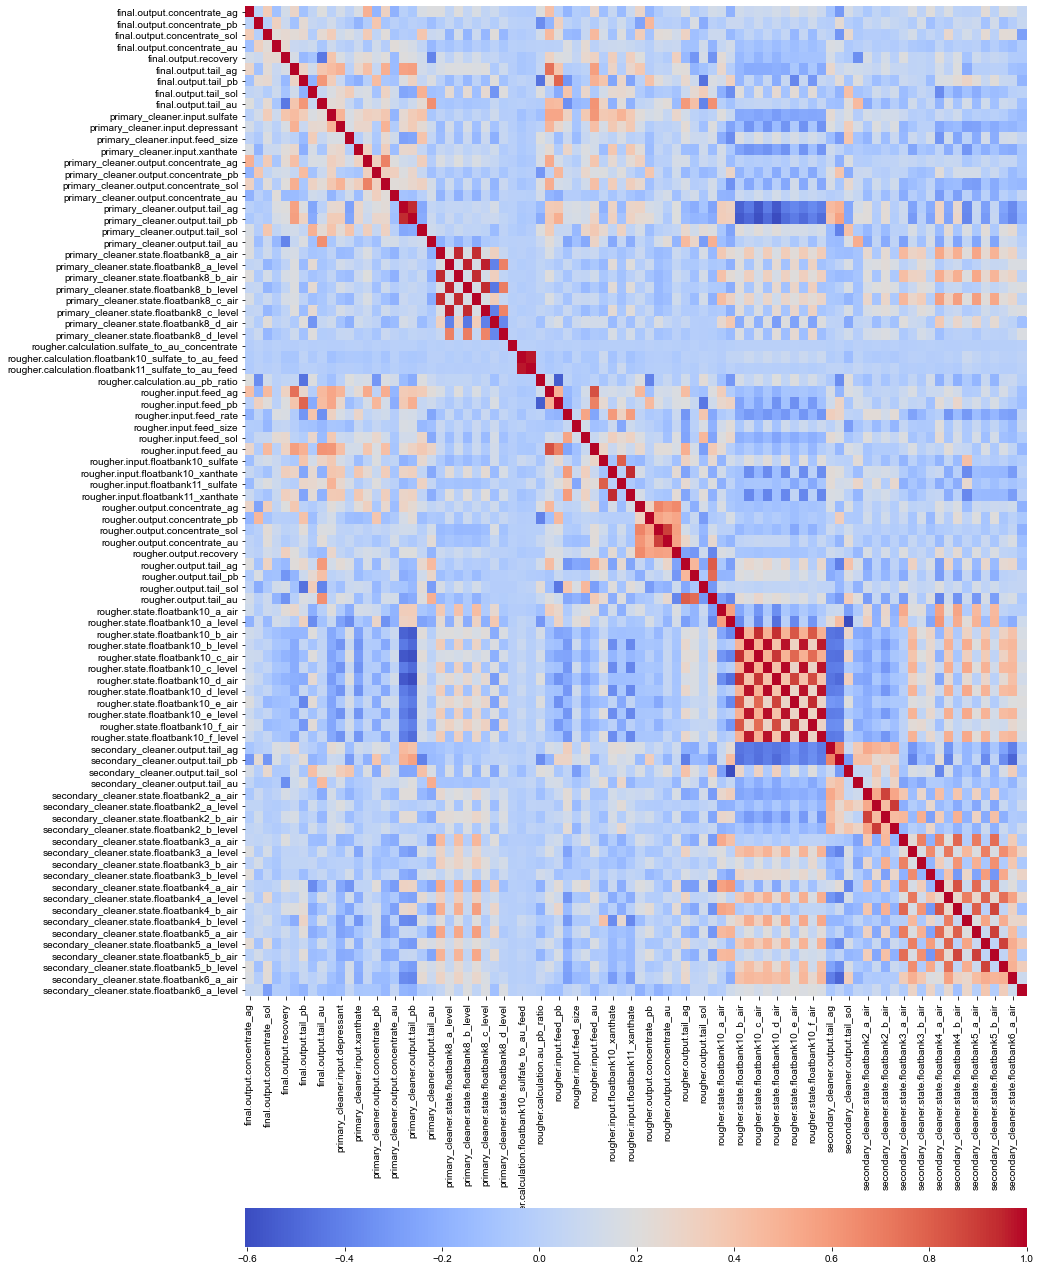

In [11]:
plt.figure(figsize=(14, 26))
sns.heatmap(train.corr(), cmap='coolwarm', annot=False, cbar_kws={'orientation':'horizontal'})
sns.set(font_scale=0.7)
plt.show()

### gold_recovery_test_new.csv

Прочитаем файл `gold_recovery_test_new.csv` из папки `datasets` и сохраним его в переменной `test`:

In [12]:
try:
    PATH = 'datasets/'
    test = pd.read_csv(os.path.join(PATH, 'gold_recovery_test_new.csv'))
    print('Прочитали файл путь:', PATH)
except:
    print('У нас проблема')

Прочитали файл путь: datasets/


Выведем на экран случайные 5 строк таблицы `test`:

In [13]:
test.sample(5).T

,2665,4817,90,1732,3831
date,2017-09-03 08:59:59,2017-12-09 22:59:59,2016-09-04 22:59:59,2016-11-23 06:59:59,2017-10-28 11:59:59
primary_cleaner.input.sulfate,60.70,202.35,128.34,194.89,197.98
primary_cleaner.input.depressant,3.99,10.04,8.02,7.00,14.03
primary_cleaner.input.feed_size,5.75,7.59,8.30,7.38,6.82
primary_cleaner.input.xanthate,1.01,0.91,0.60,1.60,1.82
primary_cleaner.state.floatbank8_a_air,"1,597.93","1,553.11","1,300.54","1,596.56","1,603.43"
primary_cleaner.state.floatbank8_a_level,-499.85,-500.00,-499.84,-499.70,-498.98
primary_cleaner.state.floatbank8_b_air,"1,597.50","1,548.95","1,297.65","1,599.83","1,600.19"
primary_cleaner.state.floatbank8_b_level,-501.28,-498.63,-500.67,-500.27,-489.02
primary_cleaner.state.floatbank8_c_air,"1,536.53","1,552.19","1,297.43","1,596.81","1,601.05"


Получим общую информацию о таблице:

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Итак, в таблице 53 колонок, 5290 строк. Тип данных в столбцах: `object`, `float64`. Есть пропущенные значения

Посмотрим на пропущенные значения в тестовой выборке

In [15]:
na_stat(test)

,количество пропущенных значений,процент пропущенных значений
rougher.input.floatbank11_xanthate,25,0.47%
rougher.input.feed_sol,21,0.40%
secondary_cleaner.state.floatbank3_a_air,9,0.17%
rougher.input.floatbank11_sulfate,8,0.15%
primary_cleaner.input.depressant,5,0.09%
rougher.input.floatbank10_sulfate,5,0.09%
primary_cleaner.input.sulfate,4,0.08%
primary_cleaner.input.xanthate,4,0.08%
rougher.input.feed_rate,3,0.06%
secondary_cleaner.state.floatbank2_a_air,3,0.06%


In [16]:
print('Дубликатов:', test.duplicated().sum())

Дубликатов: 0


Построим тепловую матрицу корреляций:

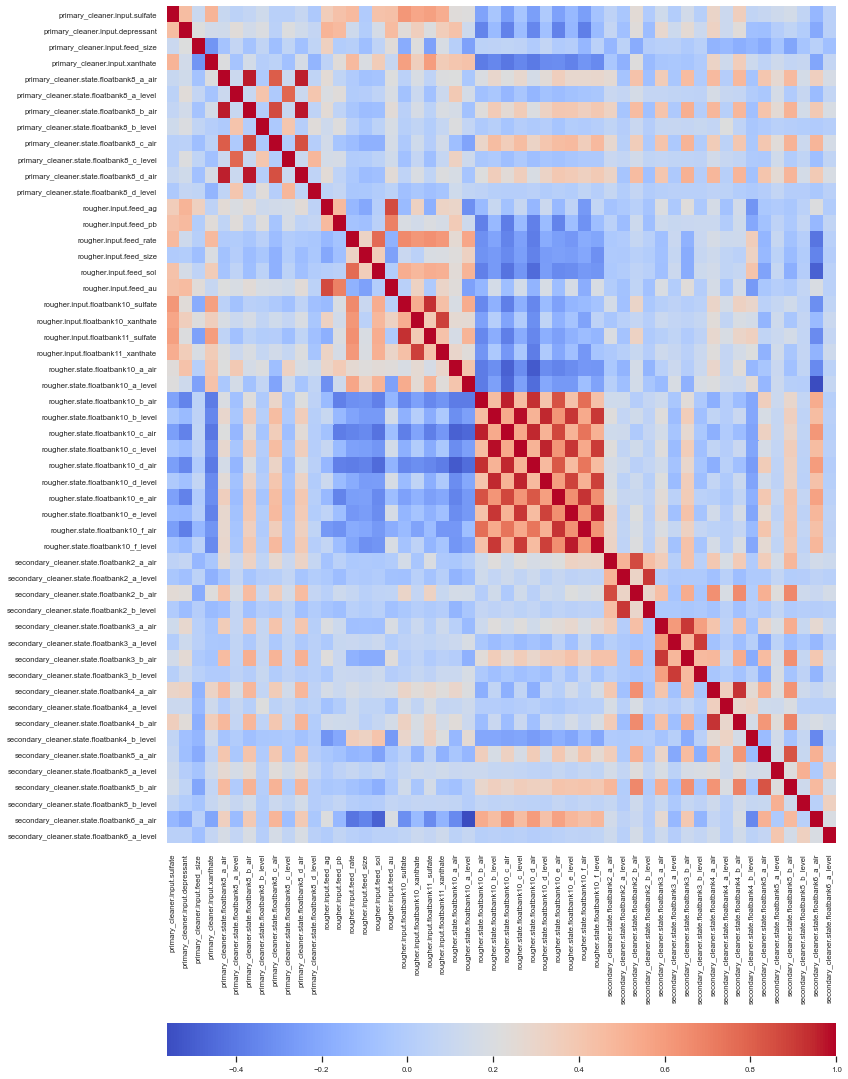

In [17]:
plt.figure(figsize=(12, 22))
sns.heatmap(test.corr(), cmap='coolwarm', annot=False, cbar_kws={'orientation':'horizontal'})
sns.set(font_scale=0.7)
plt.show()

### gold_recovery_full_new.csv

Прочитаем файл `gold_recovery_full_new.csv` из папки `datasets` и сохраним его в переменной `full`:

In [18]:
try:
    PATH = 'datasets/'
    full = pd.read_csv(os.path.join(PATH, 'gold_recovery_full_new.csv'))
    print('Прочитали файл путь:', PATH)
except:
    print('У нас проблема')

Прочитали файл путь: datasets/


Выведем на экран случайные 5 строк таблицы `full`:

In [19]:
full.sample(5).T

,14845,18170,7912,14649,3354
date,2017-12-21 16:59:59,2018-06-12 15:59:59,2017-02-02 04:59:59,2017-12-12 17:59:59,2016-06-29 08:59:59
final.output.concentrate_ag,5.21,4.17,5.55,5.52,5.95
final.output.concentrate_pb,9.06,11.39,12.97,9.91,5.95
final.output.concentrate_sol,10.38,6.21,16.62,10.81,10.77
final.output.concentrate_au,46.76,43.80,42.11,45.23,46.74
final.output.recovery,64.88,76.05,67.20,77.09,70.36
final.output.tail_ag,14.39,8.68,10.92,11.38,10.15
final.output.tail_pb,4.42,2.22,4.52,1.66,1.36
final.output.tail_sol,12.49,8.40,8.61,13.14,14.79
final.output.tail_au,4.98,1.63,3.91,2.86,2.24


Получим общую информацию о таблице:

In [20]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Итак, в таблице 87 колонок, 19_439 строк. Тип данных в столбцах: `object`, `float64`. Есть пропущенные значения

Посмотрим на пропущенные значения

In [21]:
na_stat(full)

,количество пропущенных значений,процент пропущенных значений
secondary_cleaner.output.tail_sol,1748,8.99%
rougher.input.floatbank11_xanthate,453,2.33%
rougher.state.floatbank10_e_air,436,2.24%
primary_cleaner.output.concentrate_sol,370,1.90%
secondary_cleaner.state.floatbank2_a_air,220,1.13%
final.output.concentrate_sol,211,1.09%
rougher.input.feed_size,145,0.75%
primary_cleaner.output.concentrate_pb,116,0.60%
primary_cleaner.input.xanthate,104,0.54%
final.output.tail_pb,101,0.52%


В целевых признаках пропусков нет

In [22]:
print('Дубликатов:', full.duplicated().sum())

Дубликатов: 0


Построим тепловую матрицу корреляций:

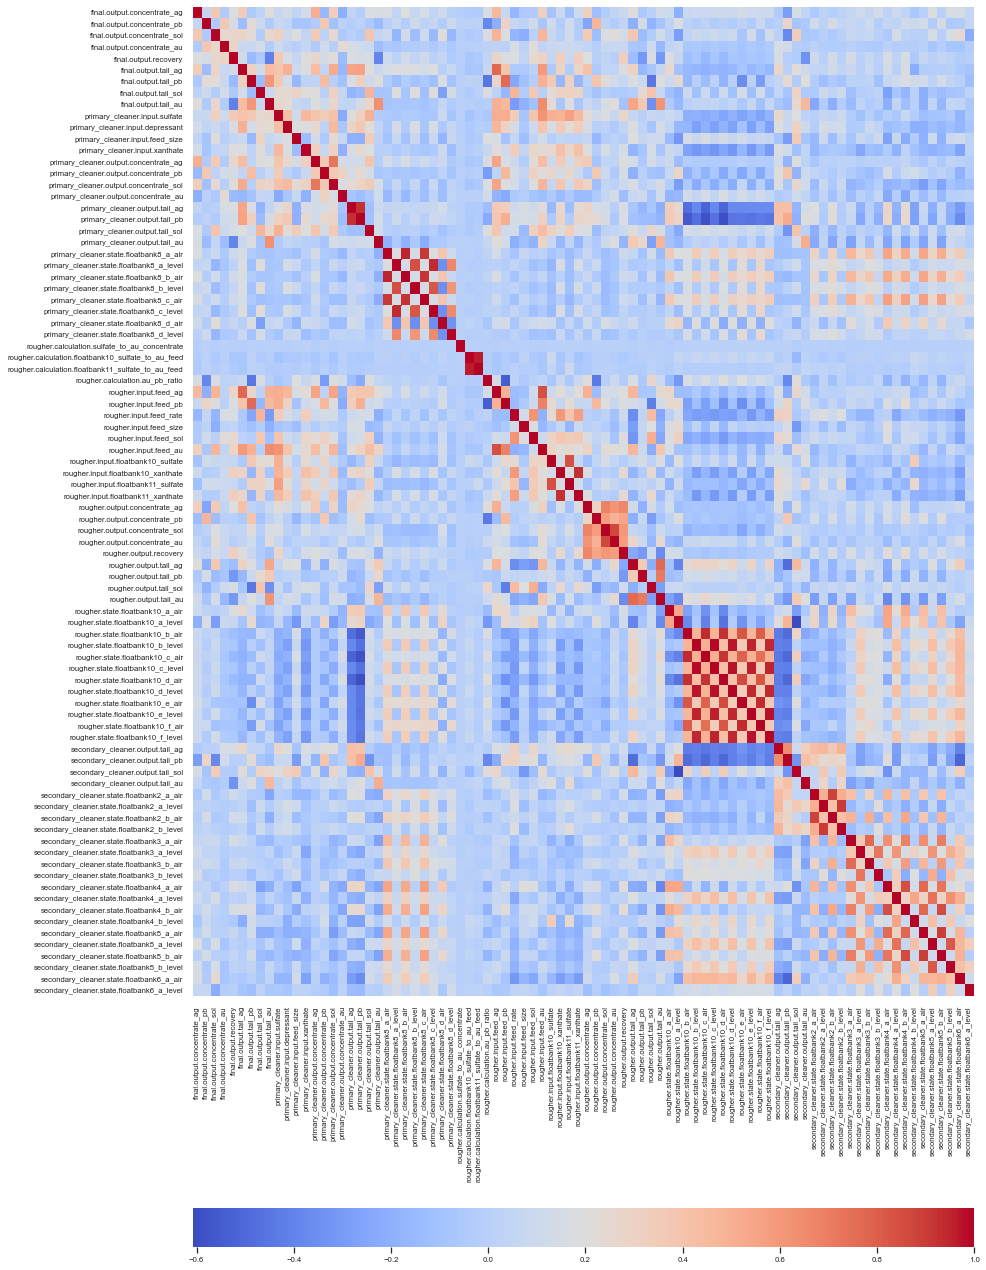

In [23]:
plt.figure(figsize=(14, 26))
sns.heatmap(full.corr(), cmap='coolwarm', annot=False, cbar_kws={'orientation':'horizontal'})
sns.set(font_scale=0.7)
plt.show()

### Проверка рассчета эффективности обогащения чернового концетрата

In [24]:
# C - доля золота в концентрате после флотации
# F - доля золота в сырье до флотации
# T - доля золота в отвальных хвостах после флотации
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

In [25]:
recovery_train = (C * (F - T)) / (F * (C - T)) * 100

In [26]:
mean_absolute_error(recovery_train, train['rougher.output.recovery'])

9.73512347450521e-15

**Вывод:**

Видим, что обсолютная средняя ошибка MAE стремится к нулю. Будем считать, что данным можно доверять

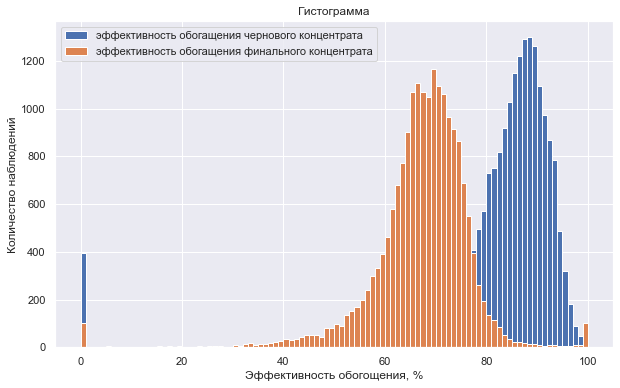

In [27]:
sns.set(font_scale=1)
plt.figure(figsize=(10, 6))
full['rougher.output.recovery'].hist(bins=100, label='эффективность обогащения чернового концентрата')
full['final.output.recovery'].hist(bins=100, label='эффективность обогащения финального концентрата')
plt.title('Гистограмма')
plt.xlabel('Эффективность обогощения, %')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

По распределению эфективности обогощения чернового и финального концентрата видим значения в 0% и 100%.

Какова природа этих анамалий - неизвестно

### Анализ признаков, недоступных в тестовой выборке

In [28]:
set(train.columns) - set(test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

По сравнению с обучающей выборкой, в тестовой выборке недоступны признаки, которые относятся к типам 
- параметры продукта `output` всех этапов 
- расчётные характеристики `calculation` этапа флотации

А же в тестовой выборке нет целевых признаков:
- `rougher.output.recovery`
- `final.output.recovery`

### Заполнение пропусков

Заполним пропуски в исходных данных только в тех признаках `test_columns`, которые есть в тестовой выборке, с помощью `fillna` и `method=ffill`, предварительно отсортировав нашу выборку по времени

In [29]:
test_columns = test.columns.tolist()
full = full.sort_values(by='date')
full[test_columns] = full[test_columns].fillna(method='ffill')

Посмотрим на пропуски:

In [30]:
na_stat(full[test_columns])

,количество пропущенных значений,процент пропущенных значений


Выполним заполнение пропусков в обучающей и тестовой выборках данными из исходной выборки методом `update` с параметром `overwrite=False`, чтобы скопировать только пропущенные значения.

Но для корректного заполнения пропусков в одном датасете значениями из другого с помощью метода `update` индексами в каждой таблице сделаем признак `date`

In [31]:
full = full.set_index('date')
train = train.set_index('date')
test = test.set_index('date')

In [32]:
test_columns.remove('date')
train.update(full[test_columns], overwrite=False)
test.update(full[test_columns], overwrite=False)

### Train и Test

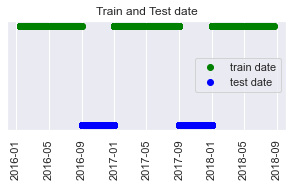

In [33]:
plt.figure(figsize=(5, 2))
plt.plot(pd.to_datetime(train.index), np.ones(train.shape[0]), 'o', c='green', label='train date')
plt.plot(pd.to_datetime(test.index), np.zeros(test.shape[0]), 'o', c='blue', label='test date')
plt.title('Train and Test date')
plt.yticks([])
plt.xticks(rotation=90)
plt.legend( loc='center right')
plt.show()

**Вывод:**
- загрузили и изучили данные
- проверили данные на дубликаты
- посмотрели на отсутствующие в тестовой выборке данные
- заполнили пропуски

## Анализ данных

### Концентрация металлов на различных этапах очистки

Составим словарь `concentrate`, в котором ключом будет название металла, а значением список с признаками

In [34]:
concentrate = {
    'Золото': ['rougher.input.feed_au', 'rougher.output.concentrate_au', 
               'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au' ],
    'Серебро': ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
                'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'],
    'Свинец': ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
               'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb' ],
}

В цикле выведем ящики с усами для признаков из словаря `concentrate`

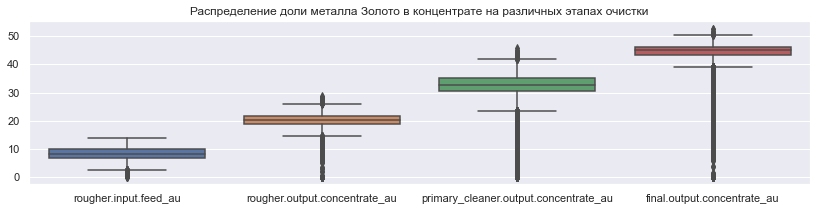

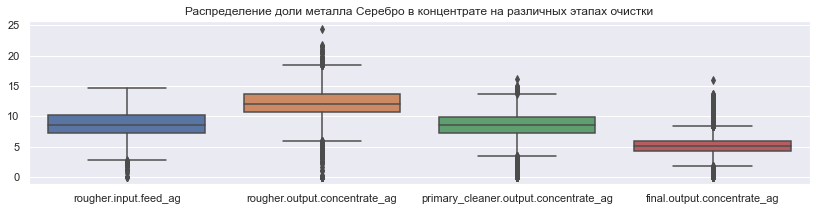

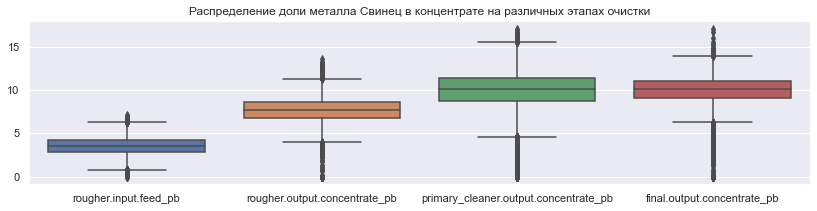

In [35]:
for key in concentrate:
    plt.figure(figsize=(14, 3))
    sns.boxplot(data = full[concentrate[key]])
    plt.title('Распределение доли металла {} в концентрате на различных этапах очистки'.format(key))
    plt.show()

- Концентрация золота `AU` возрастает в процессе обогащения: среднее значение на финальном этапе находятся в районе 45%

- Концентрация серебра `AG` увеличивается после флотации, дальше снижается в процессе обогащения. На финальном этапе среднее значение концентрации серебра составляет чуть больше 5%.

- Концентрация свинца `PB` меняется незначительно в процессе обогащения, средние значения изменяются от 7.5 до 10 %.

### Размер гранул сырья на обучающей и тестовой выборках

#### исходное сырьё

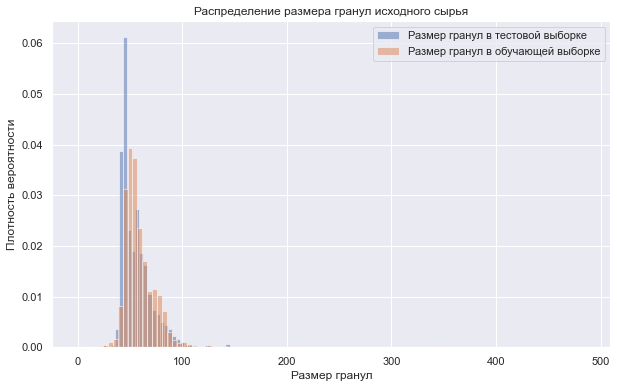

In [36]:
plt.figure(figsize=(10,6))
test['rougher.input.feed_size'].hist(bins=100, alpha=0.5, density=True, label=['Размер гранул в тестовой выборке'])
train['rougher.input.feed_size'].hist(bins=100, alpha=0.5, density=True, label=['Размер гранул в обучающей выборке'])
plt.title('Распределение размера гранул исходного сырья')
plt.ylabel('Плотность вероятности')
plt.xlabel('Размер гранул')
plt.legend()
plt.show()

С помощью ttest-а проверим средние размеры гранул сырья `rougher.input.feed_size` на обучающей и тестовой выборках

In [37]:
print(train['rougher.input.feed_size'].shape[0])
print(test['rougher.input.feed_size'].shape[0])

14149
5290


В выборках больше 30 объектов, поэтому нормальность распределений нас не волнует



Сформулируем гипотезы :
- H0: средние размеры гранул сырья а обучающей и тестовой выборках равны
- H1: средние размеры гранул сырья а обучающей и тестовой выборках  различается

In [38]:
print('Дисперсия признака в обучающей выборке:', np.var(train['rougher.input.feed_size']))
print('Дисперсия признака в тестовой выборке::', np.var(test['rougher.input.feed_size']))

Дисперсия признака в обучающей выборке: 529.2068649509116
Дисперсия признака в тестовой выборке:: 363.99032899257844


In [39]:
#примем критический уровень статистической значимости alpha равный 0.05
alpha = .05

results = ttest_ind(train['rougher.input.feed_size'], test['rougher.input.feed_size'], equal_var=False)
print('t-test p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("t-test Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
results = mw(train['rougher.input.feed_size'], test['rougher.input.feed_size'])
print('u-test p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("u-test Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

t-test p-значение: 3.134338776805464e-39
t-test Отвергаем нулевую гипотезу
u-test p-значение: 4.757516657683611e-112
u-test Отвергаем нулевую гипотезу


In [40]:
print('Средний размер гранул сырья в обучающей выборке:', train['rougher.input.feed_size'].mean())
print('Средний размер гранул сырья в тестовой выборке::', test['rougher.input.feed_size'].mean())

Средний размер гранул сырья в обучающей выборке: 60.23985599255732
Средний размер гранул сырья в тестовой выборке:: 55.952754028895136


**Вывод:**

Визуально распределения отличаются друг друга. Стат тесты отвергают нулевую гипотезу о равенстве средних выборок.

Мы имеем сложный технологический процесс, в котором имеет место быть разброс размера гранул сырья

#### стадия первичной очистки

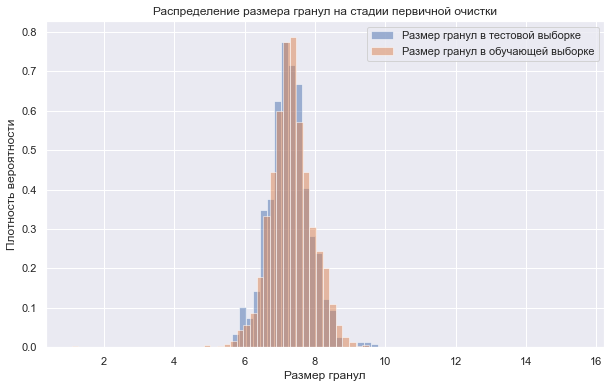

In [41]:
plt.figure(figsize=(10, 6))
test['primary_cleaner.input.feed_size'].hist(bins=50, 
                                             alpha=0.5, 
                                             density=True, 
                                             label=['Размер гранул в тестовой выборке'])
train['primary_cleaner.input.feed_size'].hist(bins=50, 
                                              alpha=0.5, 
                                              density=True, 
                                              label=['Размер гранул в обучающей выборке'])
plt.title('Распределение размера гранул на стадии первичной очистки')
plt.xlabel('Размер гранул')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

In [42]:
print('Дисперсия признака в обучающей выборке:', np.var(train['primary_cleaner.input.feed_size']))
print('Дисперсия признака в тестовой выборке::', np.var(test['primary_cleaner.input.feed_size']))

Дисперсия признака в обучающей выборке: 0.3770458141328873
Дисперсия признака в тестовой выборке:: 0.3722965577722183


In [43]:
#примем критический уровень статистической значимости alpha равный 0.05
alpha = .05

results = ttest_ind(train['primary_cleaner.input.feed_size'], 
                    test['primary_cleaner.input.feed_size'], 
                    equal_var=True)
print('t-test p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("t-test Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
results = mw(train['primary_cleaner.input.feed_size'], 
             test['primary_cleaner.input.feed_size'])
print('u-test p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("u-test Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

t-test p-значение: 1.4864182925957636e-08
t-test Отвергаем нулевую гипотезу
u-test p-значение: 8.911921244496388e-11
u-test Отвергаем нулевую гипотезу


In [44]:
print('Средний размер гранул сырья в обучающей выборке:', train['primary_cleaner.input.feed_size'].mean())
print('Средний размер гранул сырья в тестовой выборке::', test['primary_cleaner.input.feed_size'].mean())

Средний размер гранул сырья в обучающей выборке: 7.322309906901314
Средний размер гранул сырья в тестовой выборке:: 7.266339191270906


**Вывод:**

Визуально распределения очень похожи и повторяют форму друг друга.
Но стат тесты отвергают нулевую гипотезу о равенстве средних выборок.

Мы имеем сложные технологический процесс, в котором имеет место быть разброс размера гранул сырья

### Cуммарная концентрация всех веществ

Составим словарь `sum_concentrate`, в котором ключом будет название этапа обогощения, а значением список с названиями признаков

In [45]:
sum_concentrate = {
    'Сырьё': ['rougher.input.feed_ag', 'rougher.input.feed_pb',\
              'rougher.input.feed_sol', 'rougher.input.feed_au'],
    'Черновой концентрат': [x for x in full.columns if x.startswith('rougher.output.concentrate')],
    'Финальный концентрат':[x for x in full.columns if x.startswith('final.output.concentrate')]
}

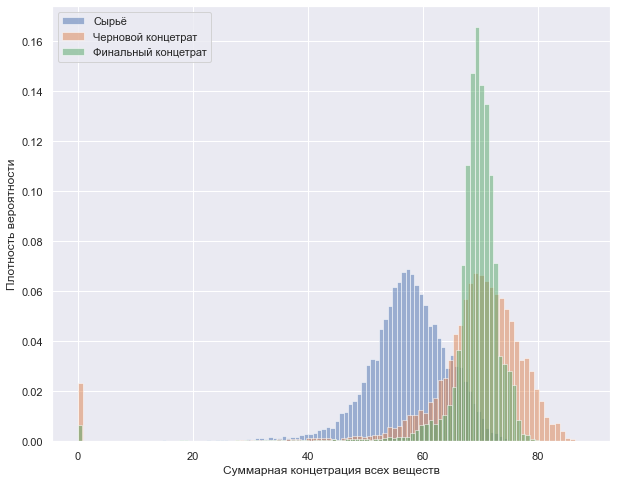

In [46]:
plt.figure(figsize=(10, 8))
np.sum(full[sum_concentrate['Сырьё']], axis = 1).hist(bins=100, 
                                                      alpha=0.5,
                                                      density=True, 
                                                      label='Сырьё')
np.sum(full[sum_concentrate['Черновой концентрат']], axis = 1).hist(bins=100, 
                                                                    alpha=0.5,
                                                                    density=True, 
                                                                    label='Черновой концетрат')
np.sum(full[sum_concentrate['Финальный концентрат']], axis = 1).hist(bins=100, 
                                                                     density=True, 
                                                                     alpha=0.5,
                                                                     label='Финальный концетрат')
plt.xlabel('Суммарная концетрация всех веществ')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

**Вывод:**
- Суммарная концентрация веществ увеличивается с течением процесса обогащения 
- Видим аномалию с нулевой суммарной концентрацией. Природа данной аномалии неизвестна: избавимся от неё, чтобы наша модель обучалась на корректных данных

В исходные данные добавим признаки с суммарной концентрацией всех веществ и удалим аномалии около нулевых значений:

In [47]:
full['rougher.input.feed_sum'] = np.sum(full[sum_concentrate['Сырьё']], axis = 1)
full['rougher.output.concentrate_sum'] = np.sum(full[sum_concentrate['Черновой концентрат']], axis = 1)
full['rougher.final.concentrate_sum'] = np.sum(full[sum_concentrate['Финальный концентрат']], axis = 1)
print('Размер исходных данных до', full.shape[0])
full = full[full['rougher.input.feed_sum'] > 1]
full = full[full['rougher.output.concentrate_sum'] > 1]
full = full[full['rougher.final.concentrate_sum'] > 1]
print('Размер исходных данных после', full.shape[0])

Размер исходных данных до 19439
Размер исходных данных после 18943


Посмотрим на результат удаления нулевой суммарной концентрации веществ

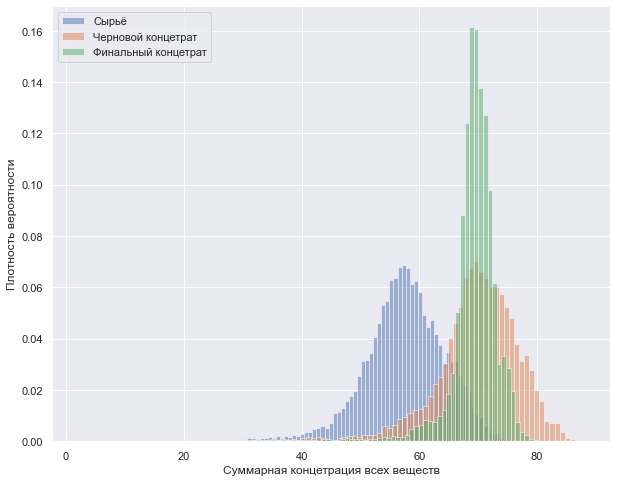

In [48]:
plt.figure(figsize=(10, 8))
np.sum(full[sum_concentrate['Сырьё']], axis = 1).hist(bins=100, 
                                                      alpha=0.5,
                                                      density=True, 
                                                      label='Сырьё')
np.sum(full[sum_concentrate['Черновой концентрат']], axis = 1).hist(bins=100, 
                                                                    alpha=0.5,
                                                                    density=True, 
                                                                    label='Черновой концетрат')
np.sum(full[sum_concentrate['Финальный концентрат']], axis = 1).hist(bins=100, 
                                                                     density=True, 
                                                                     alpha=0.5,
                                                                     label='Финальный концетрат')
plt.xlabel('Суммарная концетрация всех веществ')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

Удалим из обучающей и тестовой выборок наблюдения с нулевой суммарной концентрацией веществ, используя индексы наблюдений `full_index`, которые остались после удаления аномалий в исходных данных:

In [49]:
full_index = full.index
print('Размер обучающей выборки до', train.shape)
train = train.query('index in @full_index')
print('Размер обучающей выборки после', train.shape)

Размер обучающей выборки до (14149, 86)
Размер обучающей выборки после (13789, 86)


In [50]:
print('Размер тестовой выборки до', test.shape)
test = test.query('index in @full_index')
print('Размер тестовой выборки после', test.shape)

Размер тестовой выборки до (5290, 52)
Размер тестовой выборки после (5154, 52)


**Вывод:**

- проверили, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки
- проанализировали размера гранул на обучающей и тестовой выборках и убедились, что их распределения схожи
- провели анализ суммарной концентрации всех металлов во время разных стадий. Мы обнаружили странные значения около нуля, такие данные мы посчитали ошибочными и удалили их из всех таблиц

## Обучение моделей

### Разделение данных

В обучающей выборке оставим только те признаки, которые есть в тестовой выборке:

In [51]:
train = train[test.columns]
train.shape

(13789, 52)

Подготовим признаки для этапа флотации `rougher` и финального этапа `final`

In [52]:
# обучающая выборка входные признаки этап флотации
X_train_rougher = train[[x for x in train.columns if x.startswith('rougher')]]
# обучающая выборка Целевой признак (эффективность обогащения чернового концентрата) этап флотации
y_train_rougher = full.query('index in @train.index')['rougher.output.recovery']
print(X_train_rougher.shape, y_train_rougher.shape)

(13789, 22) (13789,)


In [53]:
# обучающая выборка входные признаки финальный этап
X_train_final = train
# обучающая выборка Целевой признак (эффективность обогащения финального концентрата) финальный этап
y_train_final = full.query('index in @train.index')['final.output.recovery']
print(X_train_final.shape, y_train_final.shape)

(13789, 52) (13789,)


In [54]:
# тестовая выборка входные признаки этап флотации
X_test_rougher = test[[x for x in test.columns if x.startswith('rougher')]]
# тестовая выборка Целевой признак (эффективность обогащения чернового концентрата) этап флотации
y_test_rougher = full.query('index in @test.index')['rougher.output.recovery']
print(X_test_rougher.shape, y_test_rougher.shape)

(5154, 22) (5154,)


In [55]:
# тестовая выборка входные признаки финальный этап
X_test_final = test
# тестовая выборка Целевой признак (эффективность обогащения финального концентрата) финальный этап
y_test_final = full.query('index in @test.index')['final.output.recovery']
print(X_test_final.shape, y_test_final.shape)

(5154, 52) (5154,)


### Вычисление итоговой sMAPE

Согласно ТЗ для решения задачи мы должны использовать метрику качества — `sMAPE` (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

Напишем функцию, для вычесления этой метрики `smape_func`

In [56]:
def smape_func(y, y_pred):
    """
    y - целевой признак
    y_pred - предсказания
    
    """
    smape = (1 / len(y)) * (((abs(y_pred - y)) / ((abs(y) + abs(y_pred)) / 2)).sum()) * 100
    return smape

Определим кастомную функцию оценки `custom_scorer`:

In [57]:
custom_scorer = make_scorer(smape_func, greater_is_better=False)

Напишем функцию `cross_val_func` для оценки качества модели кросс-валидацией. Результатом работы функции будет среднее значение оценки качества модели. А качество модели будем оценивать с помощью `custom_scorer`

In [58]:
def cross_val_func(model, x, y):
    """
    model - оценщик
    x - входные признаки
    y - целевой признак
    
    """
    smape_mean = np.mean(cross_val_score(model, x, y, scoring=custom_scorer, cv=5, n_jobs=8))
    r2_mean = np.mean(cross_val_score(model, x, y, scoring='r2', cv=5, n_jobs=8))
    return np.abs(smape_mean), r2_mean

И наконец, функция для вычисления `итоговой sMAPE` на обучающей выборке

In [59]:
def total_smape_train_func(model_rougher, model_final):
    """
    model_rougher - модель для этапа флотации
    model_final - модель для финального этапа

    """
    smape_rougher, r2_rougher = cross_val_func(model_rougher, X_train_rougher, y_train_rougher)
    smape_final, r2_final = cross_val_func(model_final, X_train_final, y_train_final)
    smape_total = 0.25 * smape_rougher + 0.75 * smape_final
    print('Этап флотации sMAPE = {:.4f}%'.format(smape_rougher))
    print('Этап флотации r2 = {:.4f}'.format(r2_rougher))
    print('Финальный этап sMAPE = {:.4f}%'.format(smape_final))
    print('Финальный этап r2 = {:.4f}'.format(r2_final))
    print('Итоговое sMAPE = {:.4f}%'.format(smape_total))

### Оценка моделей кросс-валидацией на обучающей выборке

#### Линейная регрессия

In [60]:
model_rougher = LinearRegression()
model_final = LinearRegression()
total_smape_train_func(model_rougher, model_final)

Этап флотации sMAPE = 6.5946%
Этап флотации r2 = -0.0552
Финальный этап sMAPE = 10.9450%
Финальный этап r2 = -0.1594
Итоговое sMAPE = 9.8574%


#### Случайный лес

Зафиксируем параметр псевдослучайности для наших моделей:

In [61]:
rnd_st = 12345

In [62]:
model_rougher = RandomForestRegressor(random_state=rnd_st)
model_final = RandomForestRegressor(random_state=rnd_st)
total_smape_train_func(model_rougher, model_final)

Этап флотации sMAPE = 6.6711%
Этап флотации r2 = -0.0308
Финальный этап sMAPE = 9.7980%
Финальный этап r2 = 0.0525
Итоговое sMAPE = 9.0163%


### Поиск гиперпараметров

#### GridSearch для Линейной Регрессии

Напишем функцию `grid_search_func` для поиска наилучших гиперпараметров модели: 

In [63]:
def grid_search_func(model, param_grid, X, y):
    """
    model - модель/пайплайн
    X - входные признаки
    y - целевой признак
    param_grid - параметры для перебора
    
    """
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=custom_scorer, n_jobs=-1)
    grid_search.fit(X, y)
    print('Наилучший sMAPE = {:.4f}%'.format(abs(grid_search.best_score_)))
    print('Наилучшие параметры', grid_search.best_params_)

Будем искать оптимальную размерность пространства признаков с помощью метода анализа главных компонент `PCA`

In [64]:
pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('reduce_dims', PCA()),
    ('reg', LinearRegression())])
param_grid = {
    'reduce_dims__n_components': np.arange(2,22,1),
}

Для этапа флотации:

In [65]:
grid_search_func(pipe, param_grid, X_train_rougher, y_train_rougher)

Наилучший sMAPE = 6.1656%
Наилучшие параметры {'reduce_dims__n_components': 9}


Для финального этапа:

In [66]:
grid_search_func(pipe, param_grid, X_train_final, y_train_final)

Наилучший sMAPE = 9.2749%
Наилучшие параметры {'reduce_dims__n_components': 17}


#### GridSearch для Случайного Леса

In [67]:
rfr = RandomForestRegressor(random_state=rnd_st)
param_grid = {
    'max_depth': np.arange(5,6,1),
    'n_estimators': np.arange(1000,1100,100)
}

Для этапа флотации:

In [68]:
%%time
grid_search_func(rfr, param_grid, X_train_rougher, y_train_rougher)

Наилучший sMAPE = 6.5940%
Наилучшие параметры {'max_depth': 5, 'n_estimators': 1000}
CPU times: user 59.9 s, sys: 460 ms, total: 1min
Wall time: 1min 54s


Для финального этапа:

In [69]:
%%time
grid_search_func(rfr, param_grid, X_train_final, y_train_final)

Наилучший sMAPE = 9.1935%
Наилучшие параметры {'max_depth': 5, 'n_estimators': 1000}
CPU times: user 2min 21s, sys: 111 ms, total: 2min 21s
Wall time: 4min 29s


**Вывод:**

На тестовой выборке:
- на этапе флотации модель-победитель с `sMAPE = 6.1656%` Линейная регрессия с количеством главных компонент `n_components = 9`
- на финальном этапе модель-победитель с `sMAPE = 9.1935%` Случайный лес с `max_depth = 5`, `n_estimators = 1000`

### Проверка модели на тестовой выборке

Функция для вычисления `итоговой sMAPE` на тестовой выборке:

In [70]:
def total_smape_test_func(model_rougher, model_final):
    """
    model_rougher - модель для этапа флотации
    model_final - модель для финального этапа

    """
    model_rougher.fit(X_train_rougher, y_train_rougher)
    predictions_rougher = model_rougher.predict(X_test_rougher)

    model_final.fit(X_train_final, y_train_final)
    predictions_final = model_final.predict(X_test_final)

    smape_rougher = smape_func(y_test_rougher, predictions_rougher)
    smape_final = smape_func(y_test_final, predictions_final)
    smape_total = 0.25 * smape_rougher + 0.75 * smape_final

    print('Этап флотации sMAPE = {:.4f}%'.format(smape_rougher))
    print('Финальный этап sMAPE = {:.4f}%'.format(smape_final))
    print('Итоговое sMAPE = {:.4f}%'.format(smape_total))

Проверим модели-победители на тестовой выборке

In [71]:
pipe_rougher = Pipeline([
    ('scale', MinMaxScaler()),
    ('reduce_dims', PCA(n_components=9)),
    ('reg', LinearRegression())])
model_final = RandomForestRegressor(random_state=rnd_st, max_depth=5, n_estimators=1000)

total_smape_test_func(pipe_rougher, model_final)

Этап флотации sMAPE = 4.5916%
Финальный этап sMAPE = 8.2089%
Итоговое sMAPE = 7.3046%


Посмотрим на константную модель, которая предсказывает медиану по таргету

In [72]:
model_rougher = DummyRegressor(strategy='median')
model_final = DummyRegressor()
total_smape_test_func(model_rougher, model_final)

Этап флотации sMAPE = 4.8214%
Финальный этап sMAPE = 8.5669%
Итоговое sMAPE = 7.6305%


Посмотрим на константную модель, которая предсказывает среднее по таргету

In [73]:
model_rougher = DummyRegressor(strategy='mean')
model_final = DummyRegressor()
total_smape_test_func(model_rougher, model_final)

Этап флотации sMAPE = 5.3813%
Финальный этап sMAPE = 8.5669%
Итоговое sMAPE = 7.7705%


Наилучшая из константных моделей даёт итоговый `sMAPE` = 7.6305%

Мы же получили итоговый `sMAPE` = 7.3046%, что является более лучшим результатом

## Выводы:

- выделили признаки, которые относятся к этапу флотации: признаки, которые содержат только входную информацию, доступную для флотации.
- выделили целевые признаки
- оценили модели кросс-валидацией
- выбрали наилучшую модель
- итоговое sMAPE для лучшей модели на тестовой выборке составило 7.3046%